<a href="https://colab.research.google.com/github/Sara19598/Hotel-Booking-Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **PROBLEM STATEMENT-**
### <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#Accessing the google drive
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing the libraries-**


In [ ]:
#Importing libraries for Exploratory data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression


In [ ]:
# Loading Data set of csv file
HBA=pd.read_csv('/content/drive/MyDrive/Hotel Booking Analysis - Poonam Shevkar/Hotel Bookings.csv')


**First five values of dataset of Hotel Booking analysis**

In [ ]:
HBA.head()


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


**Last five values of dataset of Hotel Booking Analysis**

In [ ]:
HBA.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
HBA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
HBA.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
len(HBA.columns)

32

In [ ]:
list(HBA.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [ ]:
HBA.shape

(119390, 32)

In [ ]:
type(HBA)

pandas.core.frame.DataFrame

In [ ]:
HBA.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
HBA['children'].fillna('unknown',inplace=True)
HBA['country'].fillna('unknown',inplace=True)
HBA['agent'].fillna('unknown',inplace=True)
HBA['company'].fillna('unknown',inplace=True)

In [ ]:
HBA.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [ ]:
HBA.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             6
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              334
company                            353
days_in_waiting_list     

In [ ]:
hotel_type=HBA['hotel'].value_counts()
hotel_type

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

In [ ]:
HBA.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
FJI        1
KIR        1
PLW        1
GUY        1
CYM        1
Name: country, Length: 178, dtype: int64

In [ ]:
HBA.children.value_counts()

0.0        110796
1.0          4861
2.0          3652
3.0            76
unknown         4
10.0            1
Name: children, dtype: int64

In [ ]:
HBA.agent.value_counts()

9.0        31961
unknown    16340
240.0      13922
1.0         7191
14.0        3640
           ...  
358.0          1
54.0           1
367.0          1
388.0          1
158.0          1
Name: agent, Length: 334, dtype: int64

([<matplotlib.patches.Wedge at 0x7f25f6dba710>,
 [Text(-0.956416133381298, -0.5433858480011854, 'City Hotel'),
  Text(1.0433630545977801, 0.592784561455838, 'Resort Hotel')],
 [Text(-0.5216815272988897, -0.29639228072791923, '66.4%'),
  Text(0.6086284485153717, 0.3457909941825721, '33.6%')])

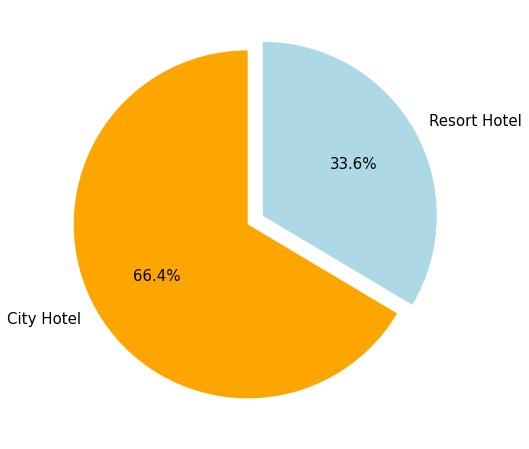

In [ ]:
plt.rcParams['figure.figsize']=8,8
labels=hotel_type.index.tolist()
sizes=hotel_type.tolist()
explode=(0,0.1)
colors=['orange','lightblue']
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90,textprops={'fontsize':15})

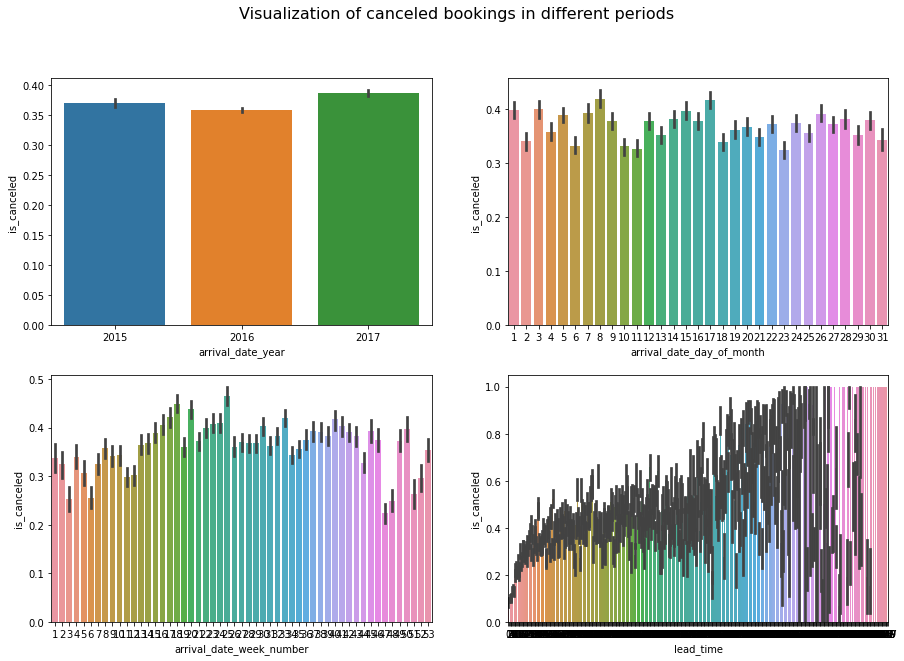

In [ ]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
fig.suptitle('Visualization of canceled bookings in different periods', fontsize=16)
sns.barplot(HBA['arrival_date_year'],HBA['is_canceled'],ax=axes[0,0])
sns.barplot(HBA['arrival_date_day_of_month'],HBA['is_canceled'],ax=axes[0,1])
sns.barplot(HBA['arrival_date_week_number'],HBA['is_canceled'],ax=axes[1,0])
sns.barplot(HBA['lead_time'],HBA['is_canceled'],ax=axes[1,1])
plt.show()


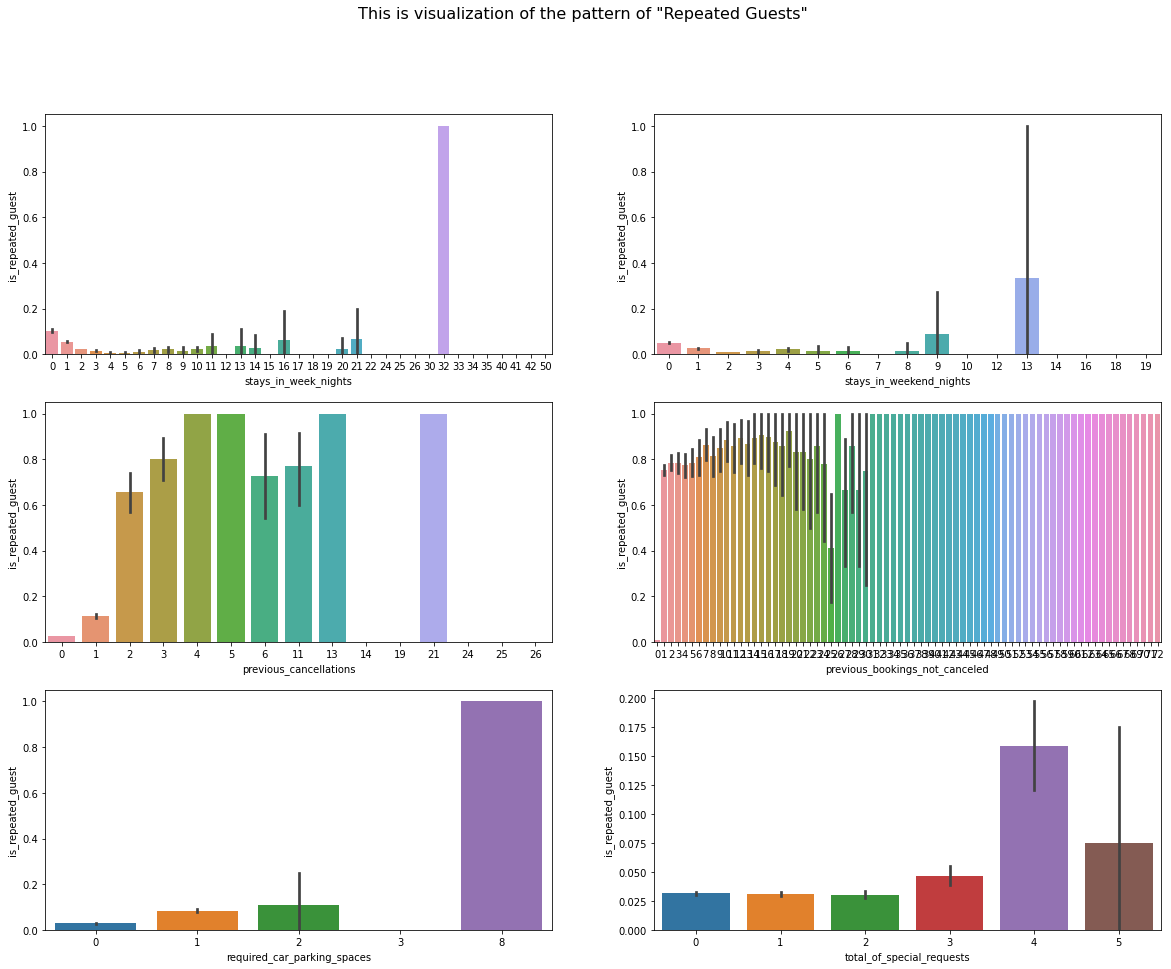

In [ ]:
fig,axes = plt.subplots(3,2,figsize=(20,15))
fig.suptitle('This is visualization of the pattern of "Repeated Guests" ', fontsize=16)
sns.barplot(HBA['stays_in_week_nights'],HBA['is_repeated_guest'],ax=axes[0,0])
sns.barplot(HBA['stays_in_weekend_nights'],HBA['is_repeated_guest'],ax=axes[0,1])
sns.barplot(HBA['previous_cancellations'],HBA['is_repeated_guest'],ax=axes[1,0])
sns.barplot(HBA['previous_bookings_not_canceled'],HBA['is_repeated_guest'],ax=axes[1,1])
sns.barplot(HBA['required_car_parking_spaces'],HBA['is_repeated_guest'],ax=axes[2,0])
sns.barplot(HBA['total_of_special_requests'],HBA['is_repeated_guest'],ax=axes[2,1])
plt.show()

**Have you ever wondered when the best time of year to book a hotel room is?**

In [ ]:
arrival_month=HBA['arrival_date_month'].value_counts()
arrival_month

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

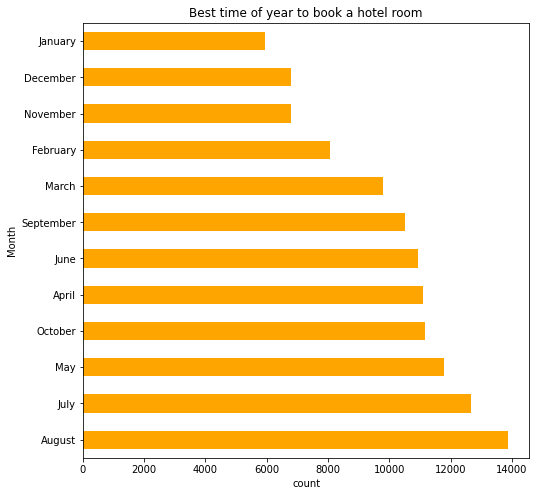

In [ ]:
arrival_month.plot(kind='barh',color="orange")
plt.xlabel("count")
plt.ylabel("Month")
plt.title("Best time of year to book a hotel room")
plt.rcParams['figure.figsize']=(15,10)

**Or the optimal length of stay in order to get the best daily rate?** 


In [ ]:
#what are the average prices for each person per night by hotel?
def average_daily_rate_person():
    for h in HBA.hotel.unique():
        print(f'Average daily rate per person: {HBA[HBA.hotel == h].adr.mean():.2f} in {h}.')
    return

average_daily_rate_person()

Average daily rate per person: 94.95 in Resort Hotel.
Average daily rate per person: 105.30 in City Hotel.


In [ ]:
#what is the average stay in days?
def average_stay_days():
    stay = HBA.loc[HBA.is_canceled == 0, ['hotel', 'stays_in_week_nights', 'stays_in_weekend_nights']] 
    stay['nights'] = stay.stays_in_week_nights + stay.stays_in_weekend_nights    
    stay = stay.groupby('hotel').agg({'nights' : 'mean'})
    
    return stay

average_stay_days()


,nights
hotel,
City Hotel,2.923618
Resort Hotel,4.142892


**What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests?**

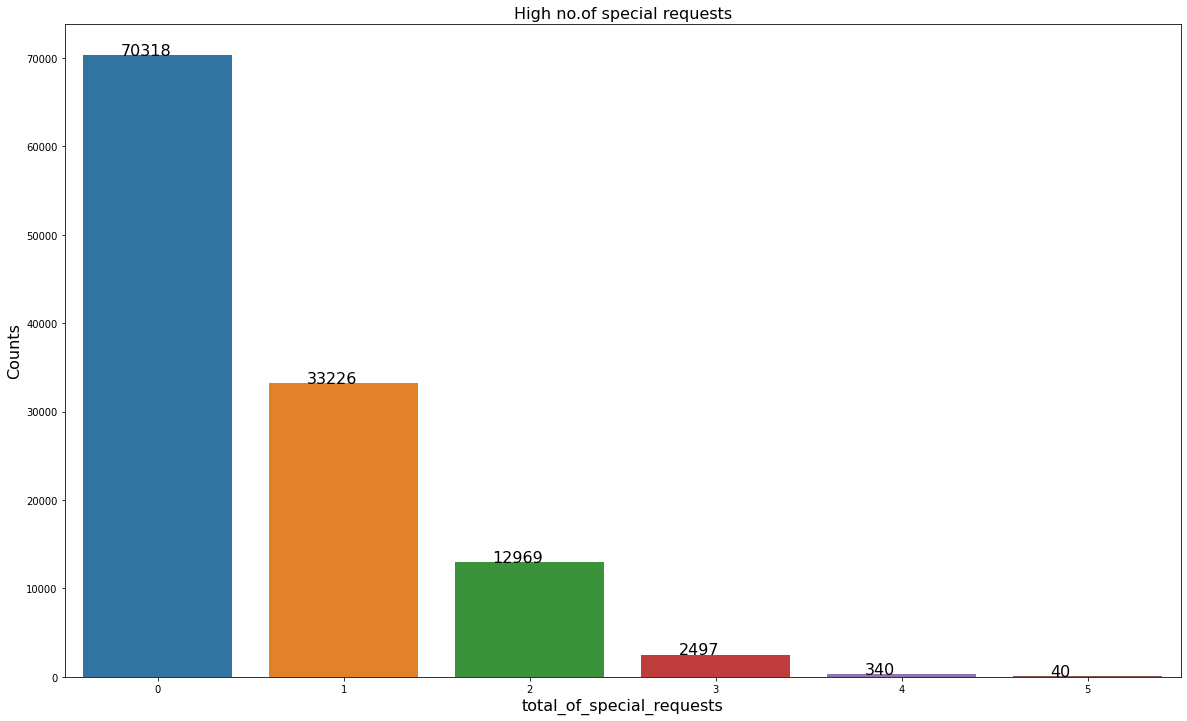

In [31]:
plt.figure(figsize=(20,12))
ch = sns.countplot(HBA['total_of_special_requests'])
plt.xlabel('total_of_special_requests', size=16)
plt.ylabel('Counts', size=16)
plt.title('High no.of special requests', size=16)
for p in ch.patches:
    ch.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), size=16)
plt.show()

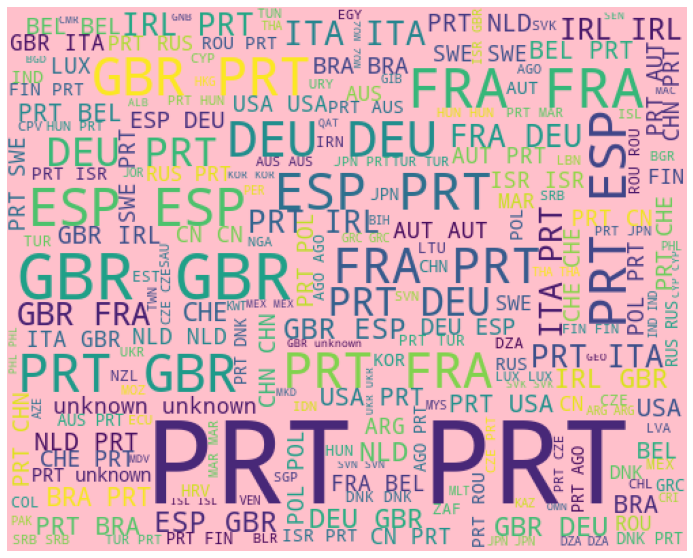

In [33]:
from wordcloud import WordCloud
from scipy import signal
WordCloud(collocations=False)
state= HBA.country.dropna(0)
plt.subplots(figsize=(20,10))
wordcloud = WordCloud(background_color = 'pink',
                     width = 500,
                     height = 400).generate(' '.join(state))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()

In [41]:
HBA.country.value_counts()[:15]

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
USA     2097
CHE     1730
CN      1279
AUT     1263
SWE     1024
Name: country, dtype: int64

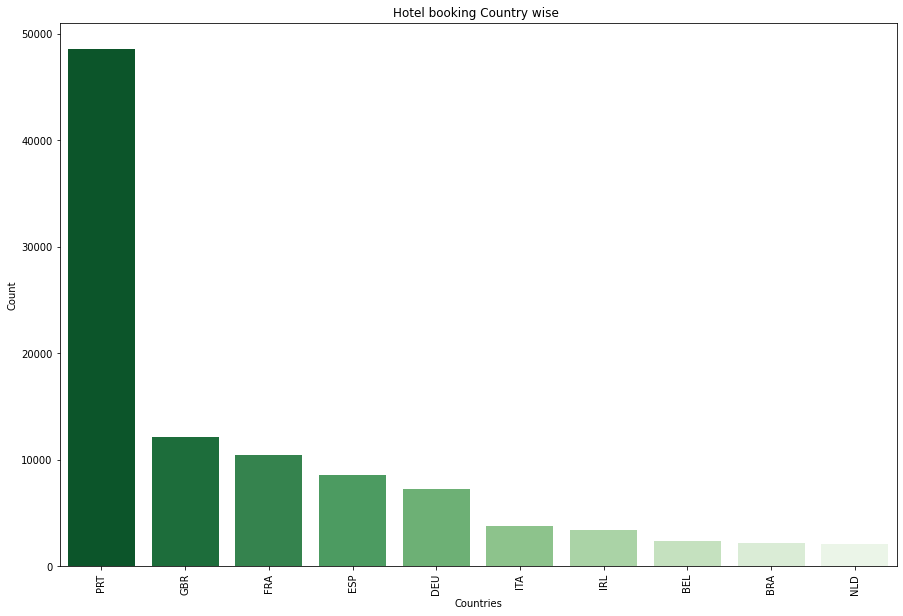

In [43]:
plt.subplots(figsize=(15,10))
sns.barplot(HBA['country'].value_counts()[:10].index,HBA['country'].value_counts()[:10].values,palette='Greens_r')
plt.title('Hotel booking Country wise ')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

In [64]:
def booking_visualization(df):
   

    country_df = pd.DataFrame()
    country_df['country'] = country_count.index
    country_df['country_count'] = country_count.values

    fig = px.choropleth(country_df, locations='country', color='country_count')

    fig.show()


In [63]:

#Create figure object
fig = go.Figure(
    go.Choroplethmapbox(locations = HBA["country"], #Assign location data
        z = HBA["hotel"], #Assign information data
        zauto = True,
        colorscale = 'viridis',
        showscale = True,
    )
)

#Update layout
fig.update_layout(
    mapbox_style = "carto-positron", #Decide a style for the map
    mapbox_zoom = 6, #Zoom in scale
    mapbox_center = {"lat": 23.9, "lon": 121.52}, #Center location of the map
)

DATA PREPROCESSING

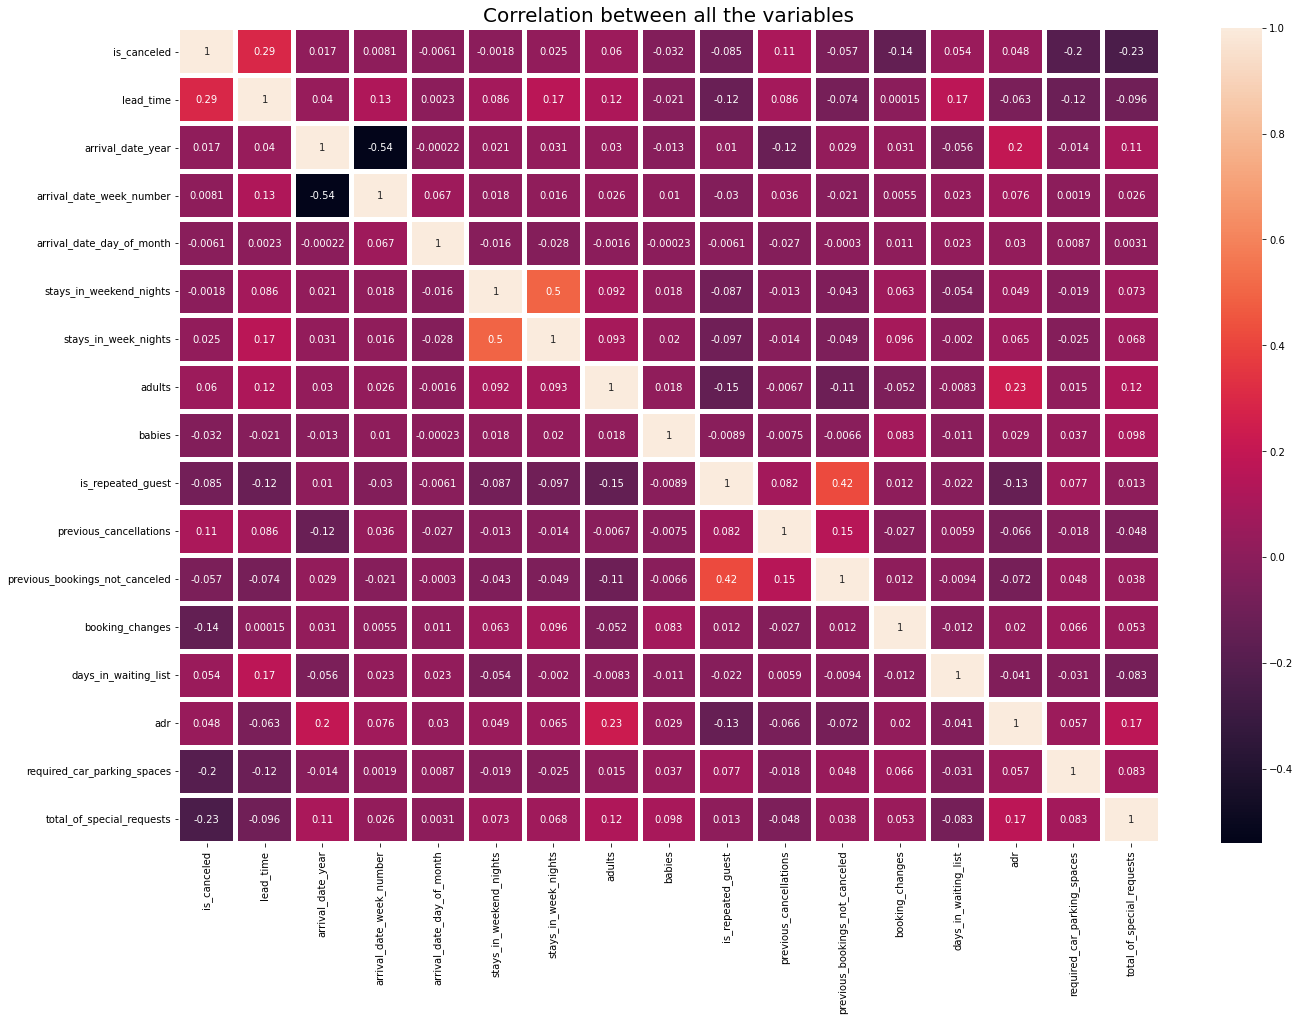

In [45]:
plt.figure(figsize=(22,15))
sns.heatmap(HBA.corr(), annot=True,linewidths=4)
plt.title('Correlation between all the variables',size=20,)
plt.show() 

In [ ]:
corr=HBA.corr()
corr
correlation = HBA.corr()['is_canceled'].abs().sort_values(ascending = False)
correlation

is_canceled                       1.000000
lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
previous_cancellations            0.110133
is_repeated_guest                 0.084793
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_week_number          0.008148
arrival_date_day_of_month         0.006130
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

The first 5 variables (lead_time, total_of_special_requests, required_car_parking_spaces, booking_changes, previous_cancellations) will be used for building a model, since they are the ones with correlation > 0.10 for is_canceled.